# Silly Rabbit tricks are for...Support Vector Machines? 
# Introducing (drum roll): The Kernel Trick!
### Essentially, the Kernel Trick like the perceptron, converts non-linearly separable dataset into a linearly separable dataset. The Kernel Trick does this by transforming a lower dimensional input space into a higher dimensional one - changing the overall shape of the dataset and making it more linear. 

### Let's start by understanding SVMs Support Vector Machines!
Support Vector Machines performs supervised classification tasks by drawing a hyperplane between the two (or more) classes ie all points of one category are on one side separate from the other category. SVM tries to find the decision boundary/hyperplane that will best separate the categories which will maximize the distance to points in either category (margin). Any points on the margin are called the Supporting Vectors. A decision boundary with a large margin will tend to have a lower generalization error. SVM aims to solve the Convex Optimization problem.

### Now on to the magic! :)
The Kernel Trick allows us to use a kernel function to compute the inner product of vectors in some transformed feature space without actually having to compute the transformed vectors themselves. 

Phi(x) - vector after transforming into that new feature space. 

The inner product of phi(x), phi(y) in the transformed space is K(x, y) ie K(x, y) = x $\cdot$ y. In this way we don't need to find phi(x) or know feature mapping/dimensionality of the points. So instead of having complicated functions with cross products we are just looking a dot products of pairs of coordinates. 


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing

<Axes: >

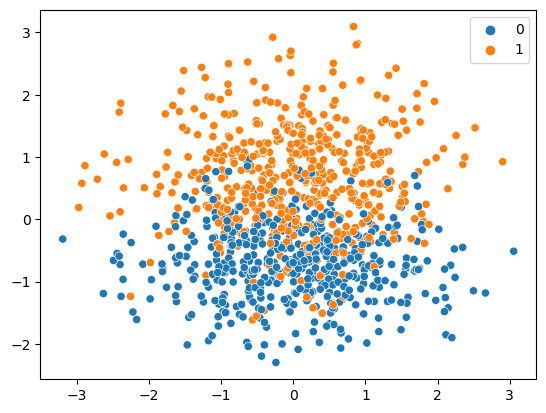

In [66]:
X, y = make_classification(n_samples=1000, n_features=4, n_redundant=0, n_informative=2,
                             n_clusters_per_class=2, random_state=14)
scaler = StandardScaler()
X = scaler.fit_transform(X)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y.reshape(-1), c='blue')

# Below shows that we can't use an exact linear line to solve this! 

In [46]:
# Splitting the data 80/20 rule
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# We are trying to find the best fit line and get an accuracy of 85.5%
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Create and fit the SVC classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
# Predict using the classifier and find accuracy
y_pred = clf.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.855


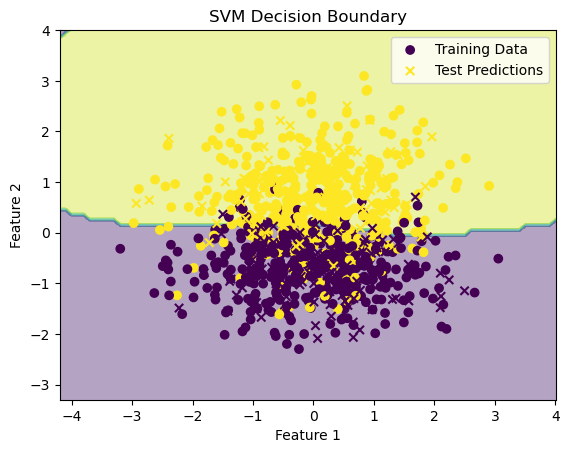

In [70]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', label='Test Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()

# Note that the colors refer to classes - Purple - 0 and Yellow - 1

/var/folders/mp/jf16gs1s7nj_6hy57v1b9hjw0000gn/T/ipykernel_81929/2838944002.py:12: RuntimeWarning: invalid value encountered in sqrt
  y1 = np.sqrt(2**2 - X1**2)


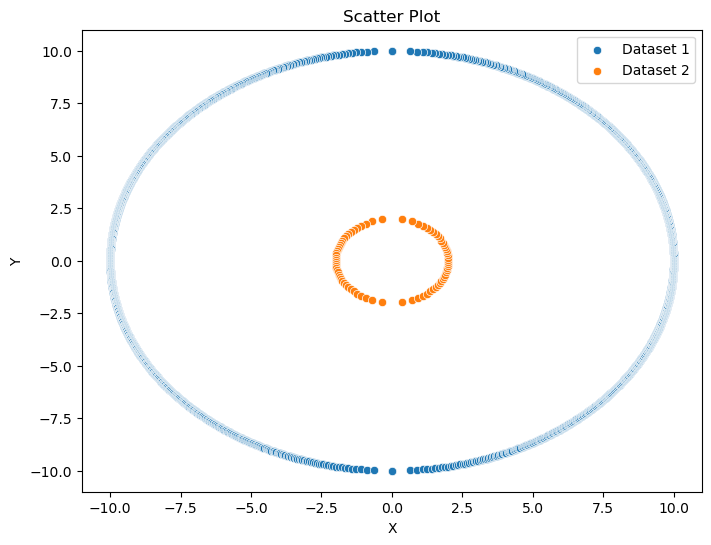

In [121]:
# Another Example 
# Making a plot
import numpy as np
import matplotlib.pyplot as plt

# Generate data
X = np.linspace(-10.0, 10.0, 1000)
y = np.sqrt(10**2 - X**2)
y = np.hstack([y, -y])
X = np.hstack([X, -X])
X1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(2**2 - X1**2)
y1 = np.hstack([y1, -y1])
X1 = np.hstack([X1, -X1])

# Plot the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=X, label='Dataset 1')
sns.scatterplot(x=y1, y=X1, label='Dataset 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.legend()
plt.show()


In [122]:
# Splitting the data 80/20 rule
from sklearn.model_selection import train_test_split
# Making y discrete
threshold = 0.5 
y = (y > threshold).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X_test is a 1D array, reshape it to a 2D array with a single column
X_test_reshaped = X_test.reshape(-1, 1)
X_train_reshaped = X_train.reshape(-1, 1)
# Create and fit the SVC classifier
clf = SVC(kernel='rbf')
clf.fit(X_train_reshaped, y_train)

# Predict using the classifier
y_pred = clf.predict(X_test_reshaped)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4775


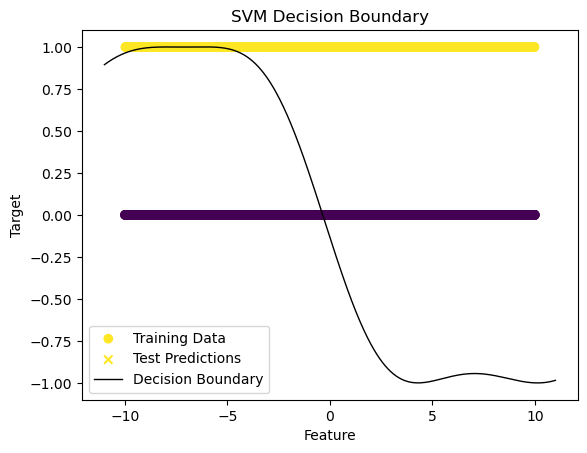

In [124]:
# Define the range of values for the feature
x_min, x_max = X_train_reshaped.min() - 1, X_train_reshaped.max() + 1

# Generate evenly spaced values within the range
xx = np.linspace(x_min, x_max, 1000).reshape(-1, 1)

# Predict the class labels for each point on the decision boundary
Z = clf.decision_function(xx)

# Plot decision boundary and data points
plt.scatter(X_train_reshaped, y_train, c=y_train, marker='o', label='Training Data')
plt.scatter(X_test_reshaped, y_pred, c=y_pred, marker='x', label='Test Predictions')
plt.plot(xx, Z, color='k', linestyle='-', linewidth=1, label='Decision Boundary')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()
# The decision boundary is splitting the two classes 0 and 1.  
# Points on one side of the boundary are predicted to belong to one class and points on the other side are predicted to belong to another class.
# The decision boundary is determined by the SVM algorithm based on the training data.
